# Detección de los trastornos del espectro autista (TEA) usando técnicas de machine learning
### Julia María Martínez Tapia 
#### 31 de marzo de 2021

## Introducción 

**Los trastornos del espectro autista (TEA) son un grupo de afecciones caracterizadas por algún grado de alteración del comportamiento social, la comunicación y el lenguaje, y por un repertorio de intereses y actividades restringido, estereotipado y repetitivo.** 

La evidencia científica disponible indica la existencia de múltiples factores, entre ellos los genéticos y ambientales, que hacen más probable que un niño pueda padecer un TEA

Los TEA aparecen en la infancia y tienden a persistir hasta la adolescencia y la edad adulta. En la mayoría de los casos se manifiestan en los primeros 5 años de vida y se presentan cuatro veces más en hombres que en mujeres. Conllevan a menudo afecciones comórbidas, como epilepsia, depresión, ansiedad y trastorno de déficit de atención e hiperactividad.

Las personas con TEA a menudo son objeto de estigmatización y discriminación, que incluye la privación injusta de atención sanitaria, educación y oportunidades para participar en sus comunidades.

**Estos trastornos suponen una enorme carga emocional y económica para las personas que los padecen y para sus familiares.** 

Segun la Organización Mundial de la Salud, se calcula que uno de cada 160 niños tiene un TEA. Esta estimación representa una cifra media, pues la prevalencia observada varía considerablemente entre los distintos estudios. No obstante, en algunos estudios bien controlados se han registrado cifras notablemente mayores. 

Según los estudios epidemiológicos realizados en los últimos 50 años, la prevalencia mundial de estos trastornos parece estar aumentando. Hay muchas explicaciones posibles para este aparente incremento de la prevalencia, entre ellas una mayor concienciación, la ampliación de los criterios diagnósticos, mejores herramientas diagnósticas y mejor comunicación.

**La intervención en la primera infancia es muy importante para optimizar el desarrollo y bienestar de las personas con un TEA. Por lo tanto, la detección temprana de esta enfermedad es clave para el bienestar de las personas que lo padecen.** 

Sin embargo existen otros trastornos mentales cuyos síntomas son muy similares a los TEA, por lo que la detección es una tarea  difícil 

**Con el auge de la aplicación de modelos basados en aprendizaje automático en las predicciones de diversas enfermedades humanas, ahora parece posible su detección temprana basada en diversos parámetros fisiológicos y de salud.**

## Objetivo del proyecto



**El objetivo del presente trabajo es evaluar la utilidad de varios modelos de machine learning en la predicción de casos de autismo.** 

A los efectos del presente proyecto se considera mas perjudicial la obtención de falsos negativos que la obtención de falsos positivos.

Ello es porque, a esto efectos, un falso negativo significa una persona que, sufriendo un TEA, es calificadas p0r el modelo como persona sin el trastorno y por tanto, una persona que puede no recibir un tratamiento médico que necesita para tener una calidad de vida aceptable.

**Es prioritario, por tanto, que el modelo de machine learning a implementar minimize la obtención de falsos negativos.**


## Dataset


El dataset utilizado procede de la fusión de tres datasets publicamente disponibles en el repositorio UCI.

Fadi Fayez Thabtah (2017), “Autistic Spectrum Disorder Screening Data for Adult” https://archive.ics.uci.edu/ml/machine-learning-databases/00426/

Fadi Fayez Thabtah (2017), “Autistic Spectrum Disorder Screening Data for children" https://archive.ics.uci.edu/ml/machine-learning-databases/00419/

adi Fayez Thabtah (2017), “Autistic Spectrum Disorder Screening Data for Adolescent” https://archive.ics.uci.edu/ml/machine-learning-databases/00420/

El dataset contiene 20 variables independientes, una columna target y 1100 registros.

Las variables independientes consisten en diez indicadores de comportamiento (behavioural features) y diez carácterísticas individuales que han probado su efectividad para detectar casos de TEA a partir de controles obtenidos de la ciencia del comportamiento.   

Se puede encontrar la descripción de las variables en este [enlace](https://www.kaggle.com/faizunnabi/autism-screening)

## I. Análisis exploratorio de datos (EDA)

In [158]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import plotly.express as px
import warnings
from scipy import stats

warnings.filterwarnings("ignore")

### 1. Análisis preliminar de los datos

In [2]:
#1. Carga de los datos

In [3]:
raw_data = pd.read_excel("Autism_todos_raw_data.xlsx")

In [4]:
raw_data.iloc[:,0:11]

,A1_score,A2_score,A3_score,A4_score,A5_score,A6_score,A7_score,A8_score,A9_score,A10_score,screening_score
0,1,1,1,1,0,0,1,1,0,0,6
1,1,1,0,1,0,0,0,1,0,1,5
2,1,1,0,1,1,0,1,1,1,1,8
3,1,1,0,1,0,0,1,1,0,1,6
4,1,0,0,0,0,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
1095,1,1,1,1,1,1,1,1,1,1,10
1096,1,0,0,0,1,0,1,0,0,1,4
1097,1,0,1,1,1,1,1,0,0,1,7
1098,1,1,1,0,1,1,1,1,1,1,9


In [5]:
raw_data.info()
#Curioso, los missings de ethniciy y relation son los mismos, se dan exactamente en los mismos 144 registros.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_score         1100 non-null   int64  
 1   A2_score         1100 non-null   int64  
 2   A3_score         1100 non-null   int64  
 3   A4_score         1100 non-null   int64  
 4   A5_score         1100 non-null   int64  
 5   A6_score         1100 non-null   int64  
 6   A7_score         1100 non-null   int64  
 7   A8_score         1100 non-null   int64  
 8   A9_score         1100 non-null   int64  
 9   A10_score        1100 non-null   int64  
 10  screening_score  1100 non-null   int64  
 11  sex              1100 non-null   object 
 12  ethnicity        956 non-null    object 
 13  jaundice         1100 non-null   object 
 14  fam_history_PDD  1100 non-null   object 
 15  country_of_res   1100 non-null   object 
 16  used_app_before  1100 non-null   object 
 17  age_num       

In [6]:
raw_data.describe()

,A1_score,A2_score,A3_score,A4_score,A5_score,A6_score,A7_score,A8_score,A9_score,A10_score,screening_score,age_num
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1094.000000
mean,0.699091,0.482727,0.551818,0.530000,0.587273,0.443636,0.477273,0.605455,0.412727,0.621818,5.411818,22.073126
std,0.458862,0.499929,0.497534,0.499326,0.492548,0.497039,0.499710,0.488975,0.492548,0.485154,2.523492,16.879373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000
50%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,5.000000,21.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.250000,30.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,383.000000


Hay un error en la variable age_number, no tiene sentido un max de edad de 383 años. Se corrije más adelante.

### 2. Análisis del target

Comprobamos si el dataset está desbalanceado comparando el número de registros de las clases que constituyen el target (en este caso, SI o NO autismo)

In [7]:
raw_data["class"]

0        NO
1        NO
2       YES
3        NO
4        NO
       ... 
1095    YES
1096     NO
1097    YES
1098    YES
1099     NO
Name: class, Length: 1100, dtype: object

In [8]:
raw_data["class"].isin(["YES"]).value_counts()

False    707
True     393
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

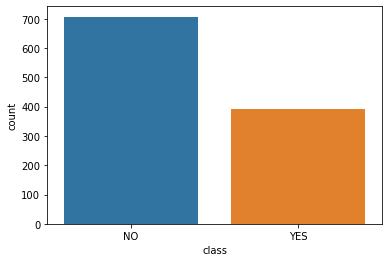

In [9]:
sns.countplot(data = raw_data, x = "class")

In [10]:
# El dataset está desbalanceado, pero no excesivamente. Por tanto no voy a hacer resampling ni a generar datos sintéticos, 
# pero lo tendré en cuenta a la hora de escoger métricas e hiperparámetros.

In [11]:
#Por otro lado, antes de dividir en train y test voy a transformar los valores de columna target "class" de YES/NO a 1/0 para poder luego 
#aplicarle más adelante el coeficiente de correlación de Person. Lo hago con un apply.

def mapping(x):
    if x == "YES":
        return 1
    elif x == "NO":
        return 0

raw_data["class"] = raw_data["class"].apply(mapping)

raw_data["class"]

0       0
1       0
2       1
3       0
4       0
       ..
1095    1
1096    0
1097    1
1098    1
1099    0
Name: class, Length: 1100, dtype: int64

In [12]:
data = raw_data

### 3. Comprensión de las variables y su relación con el target. 

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_score         1100 non-null   int64  
 1   A2_score         1100 non-null   int64  
 2   A3_score         1100 non-null   int64  
 3   A4_score         1100 non-null   int64  
 4   A5_score         1100 non-null   int64  
 5   A6_score         1100 non-null   int64  
 6   A7_score         1100 non-null   int64  
 7   A8_score         1100 non-null   int64  
 8   A9_score         1100 non-null   int64  
 9   A10_score        1100 non-null   int64  
 10  screening_score  1100 non-null   int64  
 11  sex              1100 non-null   object 
 12  ethnicity        956 non-null    object 
 13  jaundice         1100 non-null   object 
 14  fam_history_PDD  1100 non-null   object 
 15  country_of_res   1100 non-null   object 
 16  used_app_before  1100 non-null   object 
 17  age_num       

A continuación obtenemos un reporte de las columnas, con sus tipos, % de missings y cardinalidad.

In [14]:
def data_report(df):
    # Sacamos los NOMBRES
    cols = pd.DataFrame(df.columns.values, columns=["COL_N"])

    # Sacamos los TIPOS
    types = pd.DataFrame(df.dtypes.values, columns=["DATA_TYPE"])

    # Sacamos los MISSINGS
    percent_missing = round(df.isnull().sum() * 100 / len(df), 2)
    percent_missing_df = pd.DataFrame(percent_missing.values, columns=["MISSINGS (%)"])

    # Sacamos los VALORES UNICOS
    unicos = pd.DataFrame(df.nunique().values, columns=["UNIQUE_VALUES"])
    
    percent_cardin = round(unicos['UNIQUE_VALUES']*100/len(df), 2)
    percent_cardin_df = pd.DataFrame(percent_cardin.values, columns=["CARDIN (%)"])
    
    #la cardinalidad aporta información en las columnas categóricas. Si la cardinalidad es alta es que hay muchos valores únicos, normalmente 
    #serán identificadores (como nombres propios) y, dependiendo del dataset es probable que esa columna no aporte nada al target y la podamos
    #eliminar. 
    
    concatenado = pd.concat([cols, types, percent_missing_df, unicos, percent_cardin_df], axis=1, sort=False)
    concatenado.set_index('COL_N', drop=True, inplace=True)

    return concatenado.T
        
data_report(data)

COL_N,A1_score,A2_score,A3_score,A4_score,A5_score,A6_score,A7_score,A8_score,A9_score,A10_score,...,sex,ethnicity,jaundice,fam_history_PDD,country_of_res,used_app_before,age_num,age_desc,relation,class
DATA_TYPE,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,...,object,object,object,object,object,object,float64,object,object,int64
MISSINGS (%),0,0,0,0,0,0,0,0,0,0,...,0,13.09,0,0,0,0,0.55,0,13.09,0
UNIQUE_VALUES,2,2,2,2,2,2,2,2,2,2,...,2,11,2,2,89,2,59,4,6,2
CARDIN (%),0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,...,0.18,1,0.18,0.18,8.09,0.18,5.36,0.36,0.55,0.18


In [15]:
#Obtenemos el coeficiente de correlación lineal (Pearson) de las variables independientes numéricas con el target

corr = np.abs(data.corr()["class"]).sort_values(ascending = False)
print(corr)


class              1.000000
screening_score    0.834223
A9_score           0.596497
A6_score           0.567634
A5_score           0.520985
A4_score           0.508243
A3_score           0.462104
A10_score          0.421044
A7_score           0.347273
A1_score           0.290603
A2_score           0.285832
A8_score           0.275809
age_num            0.102379
Name: class, dtype: float64


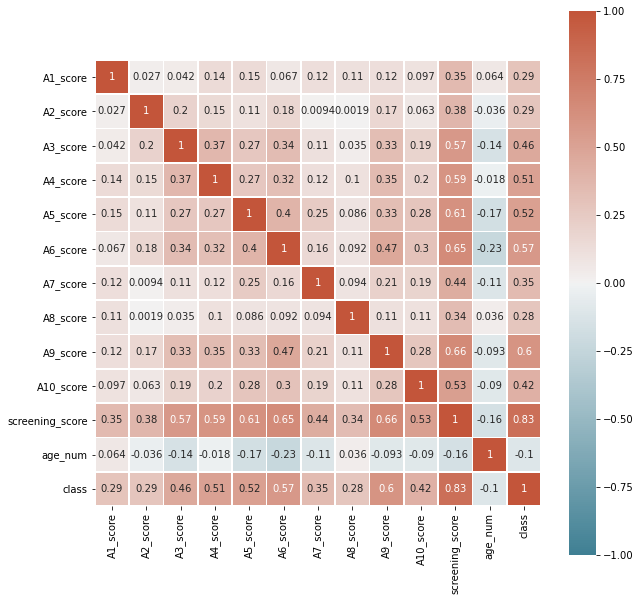

In [16]:
#Mostramos la correlación en un heatmap

plt.figure(figsize=(10,10))

sns.heatmap(data.corr(),
            vmin=-1,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(220, 20, as_cmap=True),
            square=True,
            annot=True,
            linewidths=.5);

Observamos que existen 7 variables numéricas con una correlación con el target superior al 0.4, por este orden:
    
+ screening_score    0.834223 - Puntuación resultante del método de screening.
+ A9_score           0.596497 - *9.	I find easy to work out what someone is thinking or feeling just by looking at their face.*
+ A6_score           0.567634 - *6.	I know how to tell if someone listening to me is getting bored*
+ A5_score           0.520985 - *5.	I find it easy to read between the lines when someone is talking to me.* 
+ A4_score           0.508243 - *4.	If there is an interruption, I can switch back to what I was doing very quickly.*
+ A3_score           0.462104 - *3.	I find it easy to do more than one thing at once.*
+ A10_score          0.421044 - *10. I find it difficult to work out people´s intentions*

Para poder visualizar la correlacion de las variables categóricas con el target utilizamos una matriz de Phick en lugar del coeficiente de correlación de Pearson, que éstá limitado a las variables numéricas. Como son muchas variables en total, para que no me salga un heatmap imposible de entender voy a tomar para el Phick sólo las columnas categóricas.

In [17]:
categoricas = data[['sex', 'ethnicity', 'jaundice', 'fam_history_PDD', 'country_of_res',
                        'used_app_before','age_desc', 'relation',"class"]]

categoricas


,sex,ethnicity,jaundice,fam_history_PDD,country_of_res,used_app_before,age_desc,relation,class
0,f,White-European,no,no,'United States',no,'18 and more',Self,0
1,m,Latino,no,yes,Brazil,no,'18 and more',Self,0
2,m,Latino,yes,yes,Spain,no,'18 and more',Parent,1
3,f,White-European,no,yes,'United States',no,'18 and more',Self,0
4,f,NaN,no,no,Egypt,no,'18 and more',NaN,0
...,...,...,...,...,...,...,...,...,...
1095,f,White-European,yes,yes,'United Kingdom',no,'4-11 years',Parent,1
1096,f,White-European,yes,yes,Australia,no,'4-11 years',Parent,0
1097,m,Latino,no,no,Brazil,no,'4-11 years',Parent,1
1098,m,'South Asian',no,no,India,no,'4-11 years',Parent,1


interval columns not set, guessing: ['class']


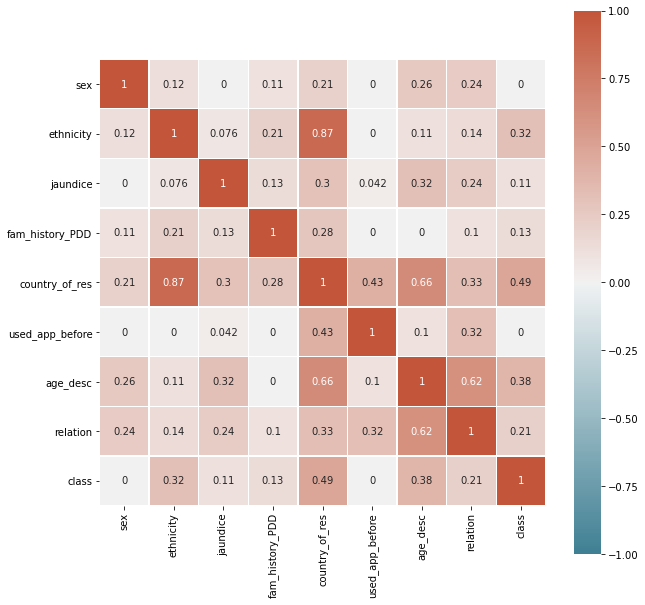

In [18]:
import phik
phik_matrix = categoricas.phik_matrix()

plt.figure(figsize=(10,10))

sns.heatmap(phik_matrix,
            vmin=-1,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(220, 20, as_cmap=True),
            square=True,
            annot=True,
            linewidths=.5);


<AxesSubplot:xlabel='sex', ylabel='count'>

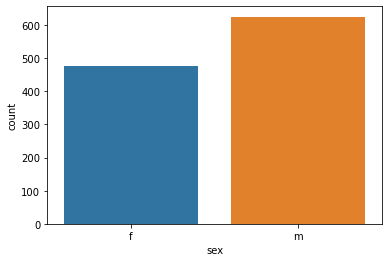

In [19]:
sns.countplot(data = data, x = "sex")

Me sorprende que la variable sexo no tenga correlación lineal con el target, esperaba que la tuviese. También me sorprende  baja correlación lineal de las variables jaundice y fam_history_PDD.
No obstante, por ahora las mantengo. 

***Sí que elimino, por el contrario, la variable used_app_before***

#### 4. Reducción preliminar

##### 4.1 Variable *used_app_before*

In [20]:
# Reducción preliminar de features sobre X_train:

data.drop(columns = ["used_app_before"], inplace = True)    

##### 4.2 Variables  *A1_score', 'A2_score', 'A3_score', 'A4_score', 'A5_score', 'A6_score','A7_score', 'A8_score', 'A9_score', 'A10_score' y screening_score*

Estas variables representan diez indicadores de comportamiento (behavioural features) definidos en el método de screening
aplicado por los autores del dataset. Se basan en las respuestas dadas por las personas objeto del screening 
a un cuestionario de 10 preguntas. Se trata de variables categóricas cuyo valor puede ser 0 o 1 (tipo numérico).  
La variable "screening_score" recoge la puntuación resultante del método de screening y es la suma de los valores positivos de las variables score A1 a A10. Tiene un coeficiente de correlación de Pearson con el target de 0.834223.

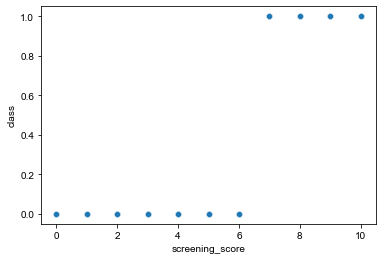

In [21]:
#Relación variable screening score y target
scree_class = raw_data[["screening_score", "class"]]

sns.scatterplot(data=scree_class, x= "screening_score",y="class",legend=True) 
ax= sns.set(style="whitegrid")

#CÓMO PONGO LOS NÚMEROS DEL 1 AL 10 EN EL EJE X!!!!??????


In [22]:
#data.drop(columns = ['A1_score', 'A2_score', 'A3_score', 'A4_score', 'A5_score', 'A6_score','A7_score', 'A8_score', 'A9_score', 'A10_score', "screening_score"], axis = "columns", inplace = True)  

data.drop(columns = ["screening_score"], axis = 1, inplace = True)  

data


,A1_score,A2_score,A3_score,A4_score,A5_score,A6_score,A7_score,A8_score,A9_score,A10_score,sex,ethnicity,jaundice,fam_history_PDD,country_of_res,age_num,age_desc,relation,class
0,1,1,1,1,0,0,1,1,0,0,f,White-European,no,no,'United States',26.0,'18 and more',Self,0
1,1,1,0,1,0,0,0,1,0,1,m,Latino,no,yes,Brazil,24.0,'18 and more',Self,0
2,1,1,0,1,1,0,1,1,1,1,m,Latino,yes,yes,Spain,27.0,'18 and more',Parent,1
3,1,1,0,1,0,0,1,1,0,1,f,White-European,no,yes,'United States',35.0,'18 and more',Self,0
4,1,0,0,0,0,0,0,1,0,0,f,NaN,no,no,Egypt,40.0,'18 and more',NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1,1,1,1,1,1,1,1,1,1,f,White-European,yes,yes,'United Kingdom',7.0,'4-11 years',Parent,1
1096,1,0,0,0,1,0,1,0,0,1,f,White-European,yes,yes,Australia,7.0,'4-11 years',Parent,0
1097,1,0,1,1,1,1,1,0,0,1,m,Latino,no,no,Brazil,4.0,'4-11 years',Parent,1
1098,1,1,1,0,1,1,1,1,1,1,m,'South Asian',no,no,India,4.0,'4-11 years',Parent,1


### 5. Análisis univariante

#### 5.3 Sex, ethnicity, jaundice, fam_history_PDD, country_of_res, age_desc, relation

Son variables categóricas, tendré que transformarlas para pasarlas a numéricas y poder usarlas en los modelos de machine learning.
Arrojan una correlación lineal baja con el target. Sex, en particular, arroja un correlación lineal de cero con el target. La correlación lineal más alta corresponde a *country of residence* (0.49), pero puede explicarse por la mayor capacidad de detección y atención de unos países respecto de otros en relación con los TEA.

#### 5.4 Age-number

Es una variable numérica que no muestra correlación lineal con el target.
Contiene un error, no tiene sentido un valor máximo de 383 años. 
Ordeno e imprimo los valores por pantalla y hago un boxplot para confirmar que no hay más errores en la variable.

In [23]:
data["age_num"].sort_values(ascending = False)

52     383.0
7       64.0
495     61.0
431     61.0
203     60.0
       ...  
91       NaN
840      NaN
873      NaN
934      NaN
946      NaN
Name: age_num, Length: 1100, dtype: float64

<AxesSubplot:xlabel='age_num'>

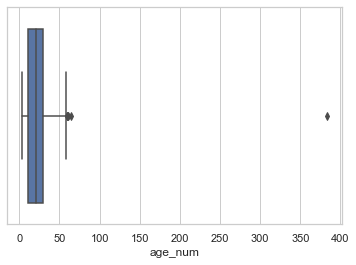

In [24]:
sns.boxplot(x='age_num', data=data)

#Viendo esta información parece que la variable solo contiene un error.

## II Preprocessing 

### 1.Limpieza de X_train

La primera medida, que ya se ha realizado con anterioridad, ha sido la eliminación de la variable "used_app_before", con correlación lineal de 0 con el target.

In [25]:
print(data.shape)

(1100, 19)


In [26]:
data['age_num'].isna().value_counts()

False    1094
True        6
Name: age_num, dtype: int64

### 1.1 Errores

La variable age_num contiene un error, una valor de 383 años. Se sustituye por la media de su categoría de edad 

In [27]:
data.groupby("age_desc")["age_num"].mean()

age_desc
'12-15 years'    15.000000
'12-16 years'    14.072165
'18 and more'    29.698006
'4-11 years'      6.354167
Name: age_num, dtype: float64

In [28]:
#Sustituimos el error por la media de edad en su rango (ya pasada a entero), que es "18 and more"
data["age_num"].groupby

data["age_num"].isin([383])

data["age_num"] = data["age_num"].replace(383.0,29)

In [29]:
#compruebo que el error ha desaparecido
data["age_num"].max()

64.0

In [30]:
data['age_num'].isna().value_counts()

False    1094
True        6
Name: age_num, dtype: int64

### 1.2 Missings 
Las variables "ethnicity", "age_num" y "relation" contienen missings. Sacamos el porcentaje de missings para tomar decisiones.

In [31]:
data_report(data.iloc[:,-11:])

COL_N,A9_score,A10_score,sex,ethnicity,jaundice,fam_history_PDD,country_of_res,age_num,age_desc,relation,class
DATA_TYPE,int64,int64,object,object,object,object,object,float64,object,object,int64
MISSINGS (%),0,0,0,13.09,0,0,0,0.55,0,13.09,0
UNIQUE_VALUES,2,2,2,11,2,2,89,58,4,6,2
CARDIN (%),0.18,0.18,0.18,1,0.18,0.18,8.09,5.27,0.36,0.55,0.18


In [32]:
#Tenemos un 13.18% de missings en etnicity y relation, y sólo un 0,5% en age_num (3 valores)

#Respecto de age_num, no puedo hacer un knn porque no tengo ninguna colunma numérica y aplicar un label encoder, pero asigna un orden a los datos y puede dar problemas 
#al aplicar los modelos de ml. Son sólo tres valores, lo mejor es cargárme las filas con missings en age_num.

#en cuanto a las variables categóricas, en este la mejor opción es sustituirlas por la moda, es decir, por el valor más frecuente, que sí se admite en categóricas. 
#Es la solución que más se aplica en el caso de columnas categóricas. Si tuviera otras columnas numéricas podría usar un knn para precedir esos missings.


In [33]:
print(data["ethnicity"].unique())

print(data["ethnicity"].mode())

['White-European' 'Latino' nan 'Others' 'Black' 'Asian'
 "'Middle Eastern '" 'Pasifika' "'South Asian'" 'Hispanic' 'Turkish'
 'others']
0    White-European
dtype: object


In [34]:
#ojo que en "relation" tenemos además un problema con la inicial de self (unos están con mayúscula y otros con minúscula),
#lo corrijo lo primero. 
data["relation"] = data["relation"].replace("self","Self")
print(data["relation"].unique())
print(data["relation"].mode())


['Self' 'Parent' nan "'Health care professional'" 'Relative' 'Others']
0    Self
dtype: object


In [35]:
data['age_num'].isna().value_counts()

False    1094
True        6
Name: age_num, dtype: int64

In [36]:
#Creo una mascara para aplicarsela más adelante a y_train, pero al final divido más adelante.
#mask_na = data['age_num'].isna()

In [37]:
#ELIMINO LAS INSTANCIAS CON Nan en AGE NUM

data = data.dropna(subset = ["age_num"])

In [38]:
#fuerzo el tipo de age_num a int:
data["age_num"] = data["age_num"].astype(int)

In [39]:
data_report(data.iloc[:,-11:])

COL_N,A9_score,A10_score,sex,ethnicity,jaundice,fam_history_PDD,country_of_res,age_num,age_desc,relation,class
DATA_TYPE,int64,int64,object,object,object,object,object,int32,object,object,int64
MISSINGS (%),0,0,0,12.71,0,0,0,0,0,12.71,0
UNIQUE_VALUES,2,2,2,11,2,2,89,58,4,5,2
CARDIN (%),0.18,0.18,0.18,1.01,0.18,0.18,8.14,5.3,0.37,0.46,0.18


In [40]:
data.shape

(1094, 19)

In [41]:
#reemplazo los missing de ethnicity por la moda, que es White-European.
data["ethnicity"] = data["ethnicity"].replace([None],"White-European")

In [42]:
#reemplazo los missing de relation por la moda, que es Self.
data["relation"] = data["relation"].replace([None],"Self")
#[podría haber hecho esto directamente con un fillna sobre la columna en cuestión .moda]

In [43]:
#Verifico que ya no tengo missings:
data_report(data)

COL_N,A1_score,A2_score,A3_score,A4_score,A5_score,A6_score,A7_score,A8_score,A9_score,A10_score,sex,ethnicity,jaundice,fam_history_PDD,country_of_res,age_num,age_desc,relation,class
DATA_TYPE,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,object,object,object,object,object,int32,object,object,int64
MISSINGS (%),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
UNIQUE_VALUES,2,2,2,2,2,2,2,2,2,2,2,11,2,2,89,58,4,5,2
CARDIN (%),0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,1.01,0.18,0.18,8.14,5.3,0.37,0.46,0.18


## III. Dividimos el dataset en train y test







In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop("class", axis=1),
                                                    data["class"],
                                                    test_size=0.2,
                                                    random_state=12)

In [45]:
#display(X_train,X_test, y_train, y_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(875, 18)
(219, 18)
(875,)
(219,)


## IV Transformaciones 

### X_train

En primer lugar, el dataset de train tiene siete columnas categóricas. Tres de ellas son binarias y las otras cuatro presentan 4 o más categorias diferentes de valores.

Respecto de las columnas categóricas binarias, asigno categorías numéricas 0/1 a los valores m/f y no/yes.


#### 2.1 Encodings

##### 2.1.1 Conversión de columnas categóricas binarias en columnas numéricas.

Respecto de las columnas categóricas binarias, asigno los valores numéricos 0/1 a las categorías m/f y no/yes.

In [46]:
X_train["jaundice"]

490      no
277      no
657      no
1094    yes
781     yes
       ... 
420      no
475      no
49       no
280      no
434      no
Name: jaundice, Length: 875, dtype: object

In [47]:
X_train["fam_history_PDD"]

490      no
277     yes
657      no
1094     no
781      no
       ... 
420      no
475      no
49       no
280     yes
434      no
Name: fam_history_PDD, Length: 875, dtype: object

In [48]:
X_train["sex"]

490     m
277     f
657     m
1094    f
781     m
       ..
420     f
475     f
49      f
280     f
434     f
Name: sex, Length: 875, dtype: object

In [49]:
#Respecto de las columnas categóricas binarias, utilizo un apply para asignar categorías numéricas 0/1 a los valores m/f y no/yes

def mapping(x):
    if x == "yes":
        return 1
    elif x == "no":
        return 0

X_train["jaundice"] = X_train["jaundice"].apply(mapping)
X_train["jaundice"]

490     0
277     0
657     0
1094    1
781     1
       ..
420     0
475     0
49      0
280     0
434     0
Name: jaundice, Length: 875, dtype: int64

In [50]:
X_train["fam_history_PDD"] = X_train["fam_history_PDD"].apply(mapping)
X_train["fam_history_PDD"]

490     0
277     1
657     0
1094    0
781     0
       ..
420     0
475     0
49      0
280     1
434     0
Name: fam_history_PDD, Length: 875, dtype: int64

In [51]:
def mapping_2(x):
    if x == "f":
        return 1
    elif x == "m":
        return 0

X_train["sex"] = X_train["sex"].apply(mapping_2)
X_train["sex"]

490     0
277     1
657     0
1094    1
781     0
       ..
420     1
475     1
49      1
280     1
434     1
Name: sex, Length: 875, dtype: int64

##### 2.1.2 Conversión de columnas categóricas de 3 o más clases en columnas numéricas.

In [52]:
#Utilizo un get encoder para transformar ethnicity, age_desc y relation. Evito el get dummies porque cuando lo haga en test me va a generar
#menos columnas nuevas (18) al faltarle clases en age_desc y ethnicity (1 en cada variable) y cuando intente pasar X_test por el modelo rl entrenado
#me da error al no coincidir el número de columnas de X_test (33) con las que espera recibir el modelo (es decir, 35 columnas).

#El one-hot encoder crea un objeto nuevo que entreno con los datos de X_train y luego aplico a los datos de X_test con un .transform().
#Asi me va a añadir siempre las mismas columnas, las que procedan a partir de los datos de X_train. En X_test tendré dos de las nuevas columnas
#todas a cero, pero me las crea en todo caso.

from sklearn.preprocessing import OneHotEncoder

onehot_train = OneHotEncoder()

X_train_onehot = onehot_train.fit(X_train[["ethnicity","age_desc","relation"]])

X_train_onehot = onehot_train.transform(X_train[["ethnicity","age_desc","relation"]])

columns = onehot_train.get_feature_names(["ethnicity","age_desc","relation"])

X_train_onehot = pd.DataFrame.sparse.from_spmatrix(X_train_onehot)

X_train_onehot.columns = columns

X_train_onehot


,ethnicity_'Middle Eastern ',ethnicity_'South Asian',ethnicity_Asian,ethnicity_Black,ethnicity_Hispanic,ethnicity_Latino,ethnicity_Others,ethnicity_Pasifika,ethnicity_Turkish,ethnicity_White-European,ethnicity_others,age_desc_'12-15 years',age_desc_'12-16 years',age_desc_'18 and more',age_desc_'4-11 years',relation_'Health care professional',relation_Others,relation_Parent,relation_Relative,relation_Self
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
871,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
872,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
873,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [53]:
X_train.reset_index(drop=True,inplace = True)

In [54]:
X_train.drop(columns = ["ethnicity","age_desc","relation"], axis = 1,inplace = True)     

In [55]:
X_train_encod = pd.concat([X_train, X_train_onehot], axis = 1)

In [56]:
X_train_encod

,A1_score,A2_score,A3_score,A4_score,A5_score,A6_score,A7_score,A8_score,A9_score,A10_score,...,ethnicity_others,age_desc_'12-15 years',age_desc_'12-16 years',age_desc_'18 and more',age_desc_'4-11 years',relation_'Health care professional',relation_Others,relation_Parent,relation_Relative,relation_Self
0,1,1,1,1,0,0,1,1,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,1,0,0,1,0,1,0,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,1,1,1,1,1,1,1,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1,1,0,0,1,0,1,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,1,0,1,0,1,0,1,1,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
871,1,0,0,0,0,1,0,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
872,1,1,0,0,0,1,1,1,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
873,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [57]:
# Las columnas tratadas con el one hot encoder me aparecen como valores tipo sparse[float64,0] y eso me da errores más adelante. 
#Utilizo el método sparse.to_dense() para transformar los valores de vuelta a float normal.
X_train_encod.iloc[:,-20:] = X_train_encod.iloc[:,-20:].sparse.to_dense()

In [58]:
X_train_encod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875 entries, 0 to 874
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   A1_score                             875 non-null    int64  
 1   A2_score                             875 non-null    int64  
 2   A3_score                             875 non-null    int64  
 3   A4_score                             875 non-null    int64  
 4   A5_score                             875 non-null    int64  
 5   A6_score                             875 non-null    int64  
 6   A7_score                             875 non-null    int64  
 7   A8_score                             875 non-null    int64  
 8   A9_score                             875 non-null    int64  
 9   A10_score                            875 non-null    int64  
 10  sex                                  875 non-null    int64  
 11  jaundice                        

In [59]:
#Sólo queda una columna categórica, country_of_res: 

paises = X_train_encod["country_of_res"].unique()
print(len(paises))

#Tiene 86 clases diferentes, no puedo hacer un get dummies con tantas categorías. 

#Elimino esta columna del dataset para los modelos de regresión logística y el svm y la dejo para el random forest y el xg boost.


79


In [60]:
X_train_encod["age_num"].isna().value_counts()

False    875
Name: age_num, dtype: int64

#### 3. Transformación de la distribución de los datos en las variables numéricas

Asimetria: 0.5102876354230012


<AxesSubplot:xlabel='age_num'>

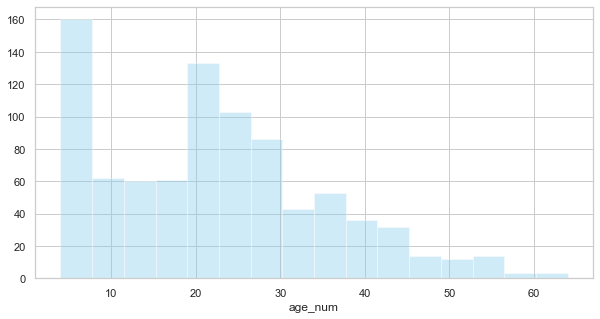

In [61]:
#Distribución de la variable age_num.

#Medimos la asimetría

from scipy.stats import skew
print("Asimetria:", skew(X_train_encod["age_num"]))

plt.figure(figsize=(10,5))

sns.distplot(X_train_encod["age_num"], kde = False, color = "#87CEEB")

#Claramente no es una distribución normal. probar cox box y t log

Original:  0.5102876354230012
Transformación logarítmica:  -0.6831190843571044
Transformación de Box-Cox:  -0.11500361902546606


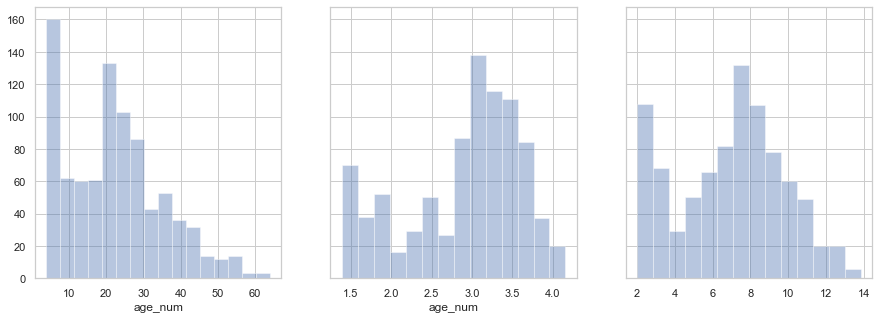

In [62]:
from scipy import stats

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

print("Original: ", skew(X_train_encod["age_num"]))
sns.distplot(X_train_encod["age_num"], kde=False, ax=axes[0])

# Logaritmic
print("Transformación logarítmica: ", skew(np.log(X_train_encod["age_num"]),))
sns.distplot(np.log(X_train_encod["age_num"]),kde=False, ax=axes[1])
# np.exp(log_value) # para invertir la transformación

# Box-cox
print("Transformación de Box-Cox: ", skew(stats.boxcox(X_train_encod["age_num"])[0]))
sns.distplot(stats.boxcox(X_train_encod["age_num"])[0],kde=False, ax=axes[2]); 

In [63]:
#Aplicamos una transformación de box cox que es la que más reduce la asimetría.

from sklearn.preprocessing import power_transform

array_age_num = X_train_encod["age_num"].to_numpy()
array_age_num = array_age_num.reshape(-1, 1)

array_age_num = power_transform(array_age_num, method='box-cox')

array_age_num = array_age_num.reshape(-1)#volvemos a pasar el array a una sola dimensión para poder convertirlo en Series de nuevo y reescribir el df.

X_train_encod["age_num"] = pd.Series(array_age_num)


In [64]:
X_train_encod["age_num"]

0      0.690763
1      0.813779
2      1.048693
3     -1.535814
4     -0.690353
         ...   
870    0.431649
871    0.498210
872    0.690763
873    0.627704
874    0.932978
Name: age_num, Length: 875, dtype: float64

#### 4. Estandarización de los datos: 

Aplico un standard scaler a las variables numéricas age_num y screening_score


In [65]:
#Aplico un standard scaler a age_num

from sklearn.preprocessing import StandardScaler

scal = StandardScaler() # Declaro el scaler

array = X_train_encod["age_num"].to_numpy()
array = array.reshape(-1, 1)#para poder entrenar el scaler necesitamos hacer un reshape a un array de 2 dimensiones

scal.fit(array) # Lo "entreno". Calculo su media y std 
array = scal.transform(array) # Aplico el scaler y sobreescribo ARRAY
#print(array)

array = array.reshape(-1)#volvemos a pasar el array a una sola dimensión para poder convertirlo en Series de nuevo y reescribir el df. 

X_train_encod["age_num"] = pd.Series(array)

X_train_encod["age_num"].max()


2.4159533617236812

In [66]:
X_train_scaled = X_train_encod

#### 5. Dataset X_train para modelar

In [67]:
X_train_encod.to_csv("Autism_todos_limpio.csv", index = False)

### 6. Tratamiento de X_test 

In [68]:
## 9. Processing X_test

X_test.info()
X_test.describe()
data_report(X_test)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 931 to 220
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_score         219 non-null    int64 
 1   A2_score         219 non-null    int64 
 2   A3_score         219 non-null    int64 
 3   A4_score         219 non-null    int64 
 4   A5_score         219 non-null    int64 
 5   A6_score         219 non-null    int64 
 6   A7_score         219 non-null    int64 
 7   A8_score         219 non-null    int64 
 8   A9_score         219 non-null    int64 
 9   A10_score        219 non-null    int64 
 10  sex              219 non-null    object
 11  ethnicity        219 non-null    object
 12  jaundice         219 non-null    object
 13  fam_history_PDD  219 non-null    object
 14  country_of_res   219 non-null    object
 15  age_num          219 non-null    int32 
 16  age_desc         219 non-null    object
 17  relation         219 non-null    

COL_N,A1_score,A2_score,A3_score,A4_score,A5_score,A6_score,A7_score,A8_score,A9_score,A10_score,sex,ethnicity,jaundice,fam_history_PDD,country_of_res,age_num,age_desc,relation
DATA_TYPE,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,object,object,object,object,object,int32,object,object
MISSINGS (%),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
UNIQUE_VALUES,2,2,2,2,2,2,2,2,2,2,2,10,2,2,49,46,4,4
CARDIN (%),0.91,0.91,0.91,0.91,0.91,0.91,0.91,0.91,0.91,0.91,0.91,4.57,0.91,0.91,22.37,21,1.83,1.83


In [69]:
X_test.describe()

,A1_score,A2_score,A3_score,A4_score,A5_score,A6_score,A7_score,A8_score,A9_score,A10_score,age_num
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.726027,0.465753,0.616438,0.561644,0.598174,0.470320,0.465753,0.634703,0.420091,0.616438,20.283105
std,0.447017,0.499969,0.487367,0.497322,0.491390,0.500262,0.499969,0.482616,0.494704,0.487367,12.204009
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
50%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,20.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,28.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,60.000000


In [70]:
print(X_test["ethnicity"].unique())
print(X_test["age_desc"].unique())
print(X_test["relation"].unique())

#En ethnicity me falta 1 categoría y en age_desc otra. En total, me faltan dos. Por eso al hacer el get dummies me quedo
#dos columnas más corta.

['White-European' 'Others' 'Asian' "'South Asian'" "'Middle Eastern '"
 'Hispanic' 'Turkish' 'Latino' 'Pasifika' 'Black']
["'4-11 years'" "'18 and more'" "'12-16 years'" "'12-15 years'"]
['Self' 'Parent' 'Relative' "'Health care professional'"]


In [71]:
#Encodings (categorical features)

X_test["jaundice"] = X_test["jaundice"].apply(mapping)
X_test["fam_history_PDD"] =X_test["fam_history_PDD"].apply(mapping)
X_test["sex"] = X_test["sex"].apply(mapping_2)

#Encodings: one hot encoder (numerical features)

X_test_onehot = onehot_train.transform(X_test[["ethnicity","age_desc","relation"]])
columns = onehot_train.get_feature_names(["ethnicity","age_desc","relation"])
X_test_onehot = pd.DataFrame.sparse.from_spmatrix(X_test_onehot)
X_test_onehot.columns = columns
X_test_onehot


,ethnicity_'Middle Eastern ',ethnicity_'South Asian',ethnicity_Asian,ethnicity_Black,ethnicity_Hispanic,ethnicity_Latino,ethnicity_Others,ethnicity_Pasifika,ethnicity_Turkish,ethnicity_White-European,ethnicity_others,age_desc_'12-15 years',age_desc_'12-16 years',age_desc_'18 and more',age_desc_'4-11 years',relation_'Health care professional',relation_Others,relation_Parent,relation_Relative,relation_Self
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
217,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [72]:

X_test.drop(columns = ["ethnicity","age_desc","relation"], axis = 1,inplace = True)   
X_test.reset_index(inplace = True, drop=True)
X_test_encod = pd.concat([X_test, X_test_onehot], axis = 1)

#Transformaciones logarítmicas: box cox

array_age_num_test = X_test_encod["age_num"].to_numpy()
array_age_num_test = array_age_num_test.reshape(-1, 1)
array_age_num_test = power_transform(array_age_num_test, method='box-cox')
array_age_num_test = array_age_num_test.reshape(-1)
X_test_encod["age_num"] = pd.Series(array_age_num_test)

#Standard scaler

array = X_test_encod["age_num"].to_numpy()
array = array.reshape(-1, 1)#para poder entrenar el scaler necesitamos hacer un reshape a un array de 2 dimensiones
array = scal.transform(array) # Aplico el scaler que he entrenando con X_train y sobreescribo ARRAY
array = array.reshape(-1)#volvemos a pasar el array a una sola dimensión para poder convertirlo en Series de nuevo y reescribir el df. 
X_test_encod["age_num"] = pd.Series(array)


In [73]:
X_test_encod

,A1_score,A2_score,A3_score,A4_score,A5_score,A6_score,A7_score,A8_score,A9_score,A10_score,...,ethnicity_others,age_desc_'12-15 years',age_desc_'12-16 years',age_desc_'18 and more',age_desc_'4-11 years',relation_'Health care professional',relation_Others,relation_Parent,relation_Relative,relation_Self
0,0,1,1,0,0,1,1,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,0,1,1,0,0,1,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,0,1,0,1,1,1,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0,1,1,0,0,0,0,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,1,0,1,0,1,1,0,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,0,1,0,0,1,0,1,0,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
215,0,0,1,0,1,1,1,1,1,1,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
216,0,0,0,1,1,1,1,0,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
217,1,0,1,1,1,1,0,0,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [74]:
# Las columnas tratadas con el one hot encoder me aparecen como valores tipo sparse[float64,0] y eso me da errores más adelante. 
#Utilizo el método sparse.to_dense() para transformar los valores de vuelta a float normal.
X_test_encod.iloc[:,-20:] = X_test_encod.iloc[:,-20:].sparse.to_dense() 

In [75]:
X_test_encod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   A1_score                             219 non-null    int64  
 1   A2_score                             219 non-null    int64  
 2   A3_score                             219 non-null    int64  
 3   A4_score                             219 non-null    int64  
 4   A5_score                             219 non-null    int64  
 5   A6_score                             219 non-null    int64  
 6   A7_score                             219 non-null    int64  
 7   A8_score                             219 non-null    int64  
 8   A9_score                             219 non-null    int64  
 9   A10_score                            219 non-null    int64  
 10  sex                                  219 non-null    int64  
 11  jaundice                        

## III Modelado

En este proyecto se van a utilizar los siguientes algoritmos:

- Logistic Regression
- Random Forest Classifier (Bagging)
- ADA Boosting
- Red neuronal (deep learning)

## 1. Logistic regression

In [76]:
#Primero elimino la columna categórica que me queda en X_train y más adelante en X_test, que el modelo de regresión logística no me permite usarlas.
X_train_encod.drop(columns = ["country_of_res"], axis = 1,inplace = True)  

In [77]:
from sklearn.linear_model import LogisticRegression
autism_log_reg = LogisticRegression()
autism_log_reg.fit(X_train_encod,y_train)

LogisticRegression()

In [104]:
#print(len(np.unique(autism_log_reg.coef_)))
print(autism_log_reg.coef_)
print(autism_log_reg.intercept_)
print(autism_log_reg.classes_)

[[ 2.47679424  2.82634488  0.18024508  0.23232629 -0.13589207  0.38884254
  -0.98321009 -0.54543232 -0.17582468  0.73447187  0.61800838  0.40339261
   0.50353495 -0.62005984  0.02806346  0.17357971 -0.1364107   0.16823727
   0.37601497 -0.88486734  0.34072845  0.53017915 -0.44199643  0.40904942
  -0.28593613 -0.21118266]]
[-3.85336045]
[0 1]


#### Feature importance 

In [79]:
intercept = autism_log_reg.intercept_
coefs = autism_log_reg.coef_.ravel()

features = pd.DataFrame(coefs, X_train_encod.columns, columns=['coefficient']).copy()
features['coefficient'] = np.abs(features['coefficient'])

features.sort_values('coefficient', ascending=False)

,coefficient
A5_score,2.907991
A4_score,2.759498
A1_score,2.711664
A7_score,2.601813
A10_score,2.572138
A9_score,2.486265
A3_score,2.472605
A6_score,2.457421
A8_score,2.444377
A2_score,2.248296


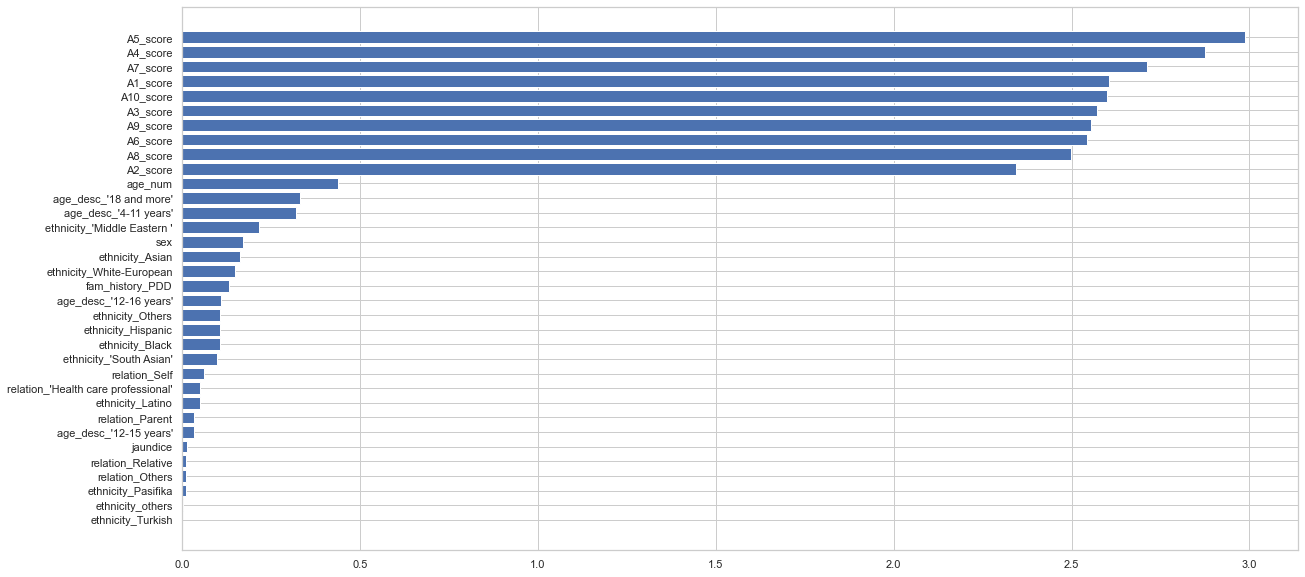

In [80]:
plt.figure(figsize=(20,10))

stdevs = []
for i in X_train_encod.columns:
    stdev = X_train_encod[i].std()
    stdevs.append(stdev)

features["stdev"] = np.array(stdevs).reshape(-1,1)
features["importance"] = features["coefficient"] * features["stdev"]
features['importance_standarized'] = features['importance'] / y_train.std()

features = features.sort_values('importance_standarized', ascending=True)
plt.barh(features.index, features.importance_standarized);

#### Predictions

In [81]:
train_predictions = autism_log_reg.predict(X_train_encod)
print(train_predictions)

[1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1
 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0
 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0
 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1
 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0
 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0
 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0
 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 1 0 0 0 0 0 0 1 

In [82]:
y_train

490     1
277     0
657     0
1094    1
781     0
       ..
420     0
475     0
49      0
280     0
434     0
Name: class, Length: 875, dtype: int64

In [83]:
X_test_encod.drop(columns = ["country_of_res"], axis = 1,inplace = True)   

In [84]:
test_predictions = autism_log_reg.predict(X_test_encod)
print(test_predictions)

[0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0
 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1
 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0
 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0
 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0]


#### Accuracy

In [85]:
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(train_predictions, y_train)

acc_test = accuracy_score(test_predictions, y_test)

print("Acc train:", acc_train)
print("Acc test:", acc_test)

Acc train: 1.0
Acc test: 1.0


### Eliminacion de variables relativas al cuestionario

Las 4 variables procedentes del cuestionario que tienen mayor coefficiente según el feature importance anterior son las siguientes:  A5_score,A4_score, A1_score y A7_score.
Las preguntas correspondientes en el cuestionario son las siguientes:

1.	I often notice small sounds when others do not:

    •	Definitely agree
    
    •	Slightly agree
    
    •	Slightly disagree
    
    •	Definitely disagree
    
    
4.	If there is an interruption, I can switch back to what I was doing very quickly.

    •	Definitely agree
    
    •	Slightly agree
    
    •	Slightly disagree
    
    •	Definitely disagree
    
    
5.	I find it easy to read between the lines when someone is talking to me. 

    •	Definitely agree
    
    •	Slightly agree
    
    •	Slightly disagree
    
    •	Definitely disagree
    
    
7.	When I am reading a story I find it is difficult to work out the character´s intentions.

    •	Definitely agree
    
    •	Slightly agree
    
    •	Slightly disagree
    
    •	Definitely disagree
    
Tomo solo las dos primeras, A5_score y A4_score, y vuelvo a modelar. 

In [86]:
X_train_encod.drop(columns = ["A1_score",'A2_score', 'A3_score','A6_score',"A7_score",'A8_score', 'A9_score', 'A10_score'], axis = "columns", inplace = True)  

In [87]:
X_test_encod.drop(columns = ["A1_score",'A2_score', 'A3_score','A6_score',"A7_score",'A8_score', 'A9_score', 'A10_score'], axis = "columns", inplace = True)  

#### Training

In [107]:
#Genero y entreno el modelo de regresión logística

from sklearn.linear_model import LogisticRegression
autism_log_reg = LogisticRegression()
autism_log_reg.fit(X_train_encod,y_train)

LogisticRegression()

#### Feature importance 

In [108]:
intercept = autism_log_reg.intercept_
coefs = autism_log_reg.coef_.ravel()

features = pd.DataFrame(coefs, X_train_encod.columns, columns=['coefficient']).copy()
features['coefficient'] = np.abs(features['coefficient'])

features.sort_values('coefficient', ascending=False)

,coefficient
A5_score,2.826345
A4_score,2.476794
ethnicity_'Middle Eastern ',0.983210
age_desc_'18 and more',0.884867
ethnicity_Black,0.734472
ethnicity_Pasifika,0.620060
ethnicity_Hispanic,0.618008
ethnicity_'South Asian',0.545432
relation_'Health care professional',0.530179
ethnicity_Others,0.503535


#### Predictions

In [186]:
train_predictions = autism_log_reg.predict(X_train_encod)
print(train_predictions)

[0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1
 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0
 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0
 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1
 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1
 1 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1
 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0
 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0
 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0
 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0
 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1
 1 0 0 0 1 0 1 0 0 0 0 1 

In [187]:
test_predictions = autism_log_reg.predict(X_test_encod)
print(test_predictions)

[0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0
 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0
 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1
 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0
 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0]


In [ ]:
#compruebo que estoy cogiendo el dataset reducido en ambos casos
X_train_encod.columns

#### Accuracy

In [188]:
acc_train = accuracy_score(train_predictions, y_train)

acc_test = accuracy_score(test_predictions, y_test)

print("Acc train:", acc_train)
print("Acc test:", acc_test)

Acc train: 0.8514285714285714
Acc test: 0.8447488584474886


#### Radial chart

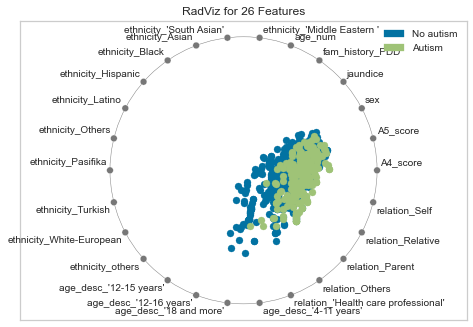

In [190]:
from yellowbrick.features.radviz import radviz

# Specify the target classes
classes = ["No autism", "Autism"]

# Instantiate the visualizer
radviz(X_train_encod, y_train.values, classes=classes);

#### Confusion matrix

La composición del target del modelo es la siguiente, siendo 0 la clase "No autismo" y 1 la clase "Autismo":

In [281]:
y_test.value_counts()

0    141
1     78
Name: class, dtype: int64

La matriz de confusión es la siguiente: 

In [291]:
from sklearn.metrics import confusion_matrix

c_matrix_lr = confusion_matrix(y_test,test_predictions)
print(c_matrix_lr)

[[121  20]
 [ 14  64]]


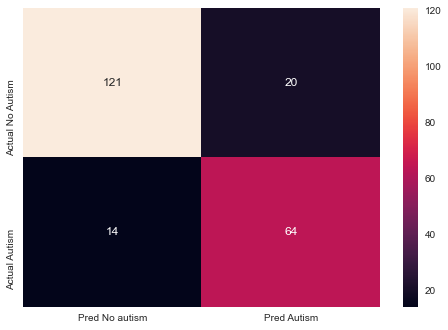

In [294]:
c_matrix_lr_df = pd.DataFrame(c_matrix_lr,
                         columns = {"Pred No autism","Pred Autism"},
                         index = {"Actual No Autism", "Actual Autism"})

sns.heatmap(c_matrix_df, annot = True, fmt = "g");


El modelo obtiene 185 aciertos y 34 errores sobre los datos de test. 

En cuanto a la composición de los errores, 20 son falsos positivos y 14 son falsos negativos.

#### Classification report

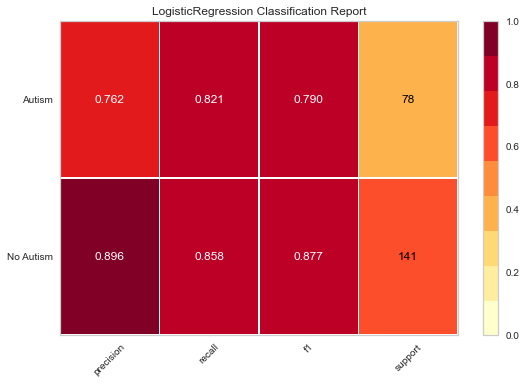

In [192]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.naive_bayes import GaussianNB

from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy

# Specify the target classes
classes = ["No Autism", "Autism"]

visualizer = ClassificationReport(LogisticRegression(max_iter = 5000), classes=classes, support=True)

visualizer.fit(X_train_encod, y_train)        # Fit the visualizer and the model
visualizer.score(X_test_encod, y_test)        # Evaluate the model on the test data
visualizer.show();                       # Finalize and show the figure

Según el gráfico, el modelo tiene mejor recall (0.821) que precisión (0.762). Esto parece tener sentido, puesto que el modelo incurre en menos falsos negativos (14) que falsos positivos (20).

**Analizamos recall y precisión**:

**Recall de 0.821** = De entre todos los casos de la clase 1 "sí autismo", el modelo es capaz de localizar 64 casos y se le escapan 14, que son los falsos negativos i.e. TP / (TP + FN)

**Precisión de 0.762** = De entre todos los casos que el modelo predice como clase 1 "sí autismo", el modelo está clasificando bien 64 y se está equivocando en 20 casos, que son los falsos negativos i.e.TP/(FP + TP).

#### ROC Curve

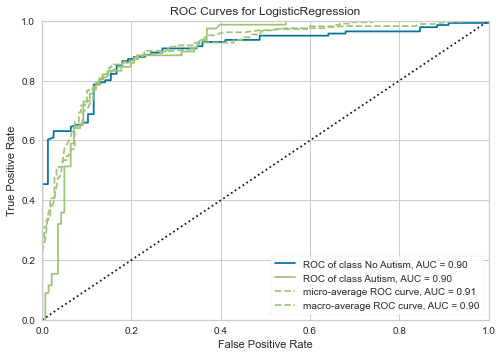

In [193]:
from yellowbrick.classifier import ROCAUC

# Instantiate the visualizer with the classification model
model = LogisticRegression(max_iter = 5000)
classes = ["No Autism", "Autism"]

visualizer = ROCAUC(model, classes = classes)
visualizer.fit(X_train_encod, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_encod, y_test)        # Evaluate the model on the test data
visualizer.show();                    # Finalize and show the figure

#### Threshold

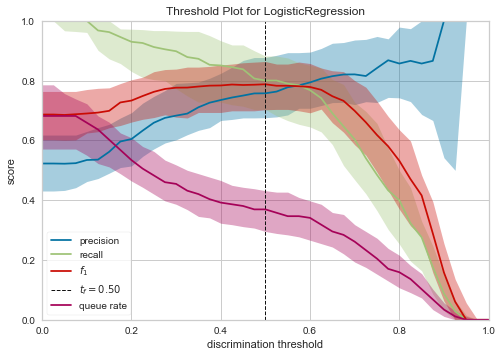

In [189]:
from yellowbrick.classifier import DiscriminationThreshold
import warnings
warnings.filterwarnings('ignore')

# Instantiate the classification model and visualizer
model = LogisticRegression(multi_class="auto", solver="liblinear")
classes = ["No Autism", "Autism"]

visualizer = DiscriminationThreshold(model)

#Con train
visualizer.fit(X_train_encod, y_train)        # Fit the data to the visualizer
visualizer.show();           # Finalize and render the figure

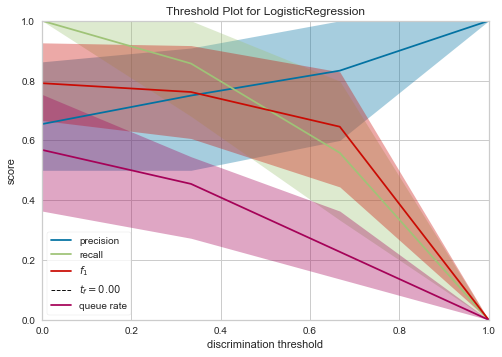

In [194]:
#Con test

model = LogisticRegression(multi_class="auto", solver="liblinear")
classes = ["No Autism", "Autism"]
visualizer = DiscriminationThreshold(model)

visualizer.fit(X_test_encod, y_test)        # Fit the data to the visualizer
visualizer.show(); 

#### OJOOOO PENDIENTE, NO ME SALEEEE??? PARECE QUE SE CRUZAN COMO EN 0.45 PERO PORQUÉ NO ME pinta el umbral? PORQUÉ DA CERO???

#### Probabilidades para cada instancia

In [195]:
probab = model.predict_proba(X_test_encod)
print(probab)

print(len(model.predict_proba(X_test_encod)))

[[0.96387764 0.03612236]
 [0.95620997 0.04379003]
 [0.7252063  0.2747937 ]
 [0.98489553 0.01510447]
 [0.70265048 0.29734952]
 [0.46970113 0.53029887]
 [0.9905657  0.0094343 ]
 [0.16875601 0.83124399]
 [0.51266277 0.48733723]
 [0.99187066 0.00812934]
 [0.29669596 0.70330404]
 [0.41018943 0.58981057]
 [0.17844518 0.82155482]
 [0.98090489 0.01909511]
 [0.98496252 0.01503748]
 [0.96594469 0.03405531]
 [0.96721004 0.03278996]
 [0.75419742 0.24580258]
 [0.69015706 0.30984294]
 [0.67143544 0.32856456]
 [0.96376634 0.03623366]
 [0.92186129 0.07813871]
 [0.19595638 0.80404362]
 [0.98535524 0.01464476]
 [0.33358603 0.66641397]
 [0.17588228 0.82411772]
 [0.84901954 0.15098046]
 [0.20865983 0.79134017]
 [0.98595859 0.01404141]
 [0.98831413 0.01168587]
 [0.28220336 0.71779664]
 [0.75419742 0.24580258]
 [0.84286247 0.15713753]
 [0.20113826 0.79886174]
 [0.82283286 0.17716714]
 [0.33746841 0.66253159]
 [0.71376232 0.28623768]
 [0.51182206 0.48817794]
 [0.97186124 0.02813876]
 [0.29669596 0.70330404]


In [196]:
ins = 100
test_predictions[ins]
probab[ins]

array([0.5537529, 0.4462471])

In [197]:
print("La predicción para la instancia",ins,"de test ha sido la siguiente:",test_predictions[ins], "y su probabilidad",probab[ins])

La predicción para la instancia 100 de test ha sido la siguiente: 1 y su probabilidad [0.5537529 0.4462471]


### OJOOOO NO ENTIENDO PORQUÉ HACE ESTA PREDICCIÓN CON LA INSTANCIA 100, NO LO ENTIENDO, PREGUNTAAAR!!!!

#### **CONCLUSION**

El modelo de regresión logística generaliza bien, con un accurate del 0.84. El recall, que es lo que más nos interesa en este caso, es muy razonable con un 0.821.
Voy a probar otros modelos para intentar mejorarlo. 

## 2. Random Forest Classifier 

In [301]:
from sklearn.ensemble import RandomForestClassifier

autism_rnd_clf = RandomForestClassifier(n_estimators = 400, 
                                max_depth = 3,
                                random_state = 42)

#### Training

In [302]:
autism_rnd_clf.fit(X_train_encod,y_train)

RandomForestClassifier(max_depth=3, n_estimators=400, random_state=42)

### Feature importance

In [259]:
coeffs = autism_rnd_clf.feature_importances_

features = pd.DataFrame(coefs, X_train_encod.columns, columns=['coefficient']).copy()
features['coefficient'] = np.abs(features['coefficient'])
features.sort_values('coefficient', ascending=False)

,coefficient
A4_score,0.339514
A5_score,0.327124
age_num,0.082524
age_desc_'18 and more',0.052479
ethnicity_'Middle Eastern ',0.027846
relation_Parent,0.022305
relation_Self,0.022010
age_desc_'12-16 years',0.020167
fam_history_PDD,0.014128
ethnicity_Asian,0.012867


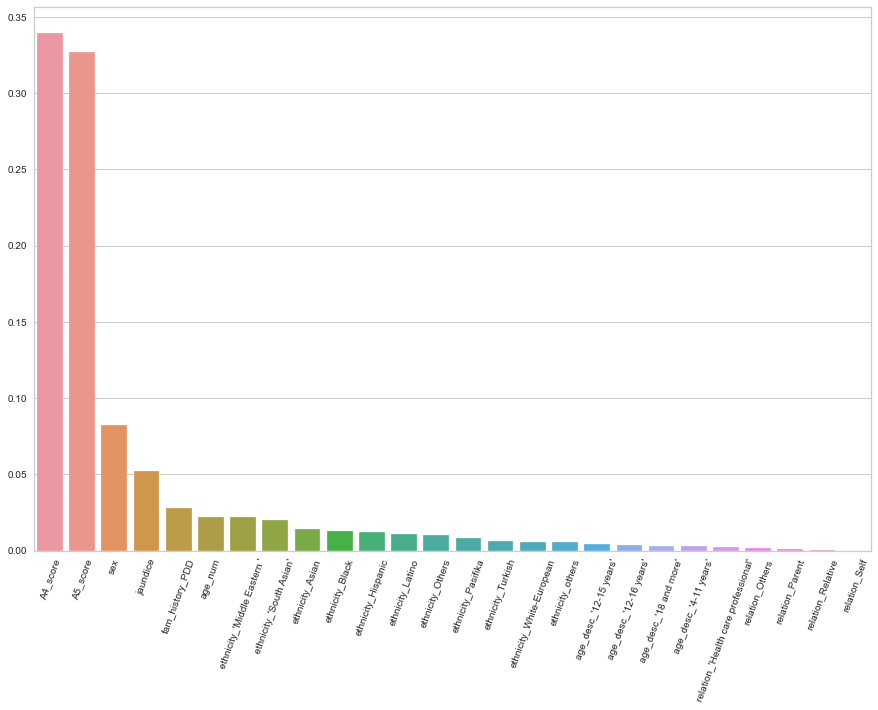

In [201]:
#ordeno los coeficientes de forma descendente. 
coeffs_plot = coeffs[::-1].sort()

#ploteo
plt.figure(figsize=(15,10))
sns.barplot(x =  X_train_encod.columns, y = coeffs)
plt.xticks(rotation=70);

### Predictions

In [303]:
train_predictions_rnd = autism_rnd_clf.predict(X_train_encod)

test_predictions_rnd = autism_rnd_clf.predict(X_test_encod)

### Accuracy

In [304]:
acc_train_rnd = accuracy_score(train_predictions_rnd, y_train)

acc_test_rnd = accuracy_score(test_predictions_rnd, y_test)

print("Acc train:", acc_train_rnd )
print("Acc test:", acc_test_rnd)

Acc train: 0.8445714285714285
Acc test: 0.867579908675799


Los hiperparámetros que dan mejor accuracy para el random forest son 400 árboles y un máximo de 3 ramas de profundidad. Más allá empiezo a sobreentrenar. 

#### Confusion matrix

In [309]:
#Calculo la matriz de confusión
from sklearn.metrics import confusion_matrix

c_matrix_rnd = confusion_matrix(y_test,test_predictions_rnd)
print(c_matrix_rnd)

[[131  10]
 [ 19  59]]


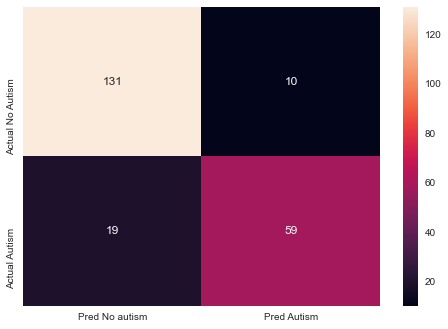

In [312]:
#Ploteo

c_matrix_rnd_df = pd.DataFrame(c_matrix_rnd,
                         columns = {"Pred No autism","Pred Autism"},
                         index = {"Actual No Autism", "Actual Autism"})

sns.heatmap(c_matrix_rnd_df, annot = True, fmt = "g");

El modelo obtiene 190 aciertos y 29 errores sobre los 219 datos de test. 

En cuanto a la composición de los errores, 10 son falsos positivos y 19 son falsos negativos.

#### CONCLUSIÓN

Aunque el accuracy y la precisión del random forest mejoran los de la regresión logística, el recall empeora, pasando de los 14 de la regresión logística a 19 en el random forest.

**Siendo prioritario en este proyecto reducir el numero de falsos negativos, es decir, mejorar el recall, el modelo de random forest tiene peor comportamiento que la regresión logística.**

## COMPARATIVA 

In [316]:
prec_rec_lr = c_matrix_lr[[0,1],[1,0]]
prec_rec_lr 

array([20, 14], dtype=int64)

In [317]:
prec_rec_rnd = c_matrix_rnd[[0,1],[1,0]]
prec_rec_rnd

array([10, 19], dtype=int64)

In [323]:
c_matrix_comp = np.concatenate([prec_rec_lr,prec_rec_rnd]).reshape(2,2).T
c_matrix_comp

array([[20, 10],
       [14, 19]], dtype=int64)

In [332]:
c_matrix_df_comp = pd.DataFrame(c_matrix_comp,
                         columns = ["Logistic Regression","Random Forest"],
                         index = ["Falsos positivos", "Falsos negativos"])
c_matrix_df_comp

,Logistic Regression,Random Forest
Falsos positivos,20,10
Falsos negativos,14,19
